In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

df = pd.read_excel("data/Telco_customer_churn_adapted_v2.xlsx")
products = ['Games Product', 'Music Product', 'Education Product', 'Call Center', 'Video Product', 'Use MyApp']
X = df.copy()[products]

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in products:
    X[col] = label_encoder.fit_transform(X[col])
X.head()

,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp
0,2,2,0,0,0,0
1,0,0,0,0,0,0
2,0,0,2,0,2,2
3,0,0,2,1,2,2
4,0,2,2,0,2,2


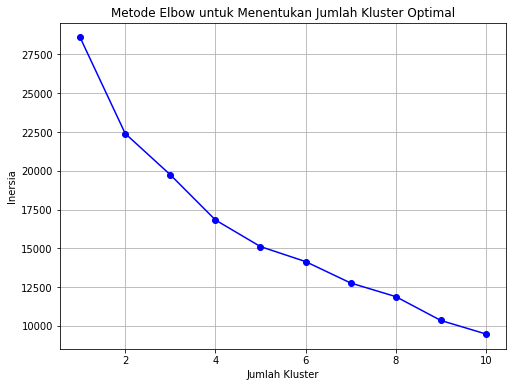

In [14]:
from sklearn.cluster import KMeans


# Hitung inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
k_values = range(1, 11)  # Coba dari 1 hingga 10 kluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot elbow method untuk menentukan jumlah kluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid()
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

# Inisialisasi model K-Means dengan jumlah kluster yang berbeda (misalnya, 2 hingga 5)
k_values = range(2, 11)
best_score = -1
best_k = 0

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X)
    
    # Prediksi kluster untuk setiap data poin
    labels = kmeans.labels_
    
    # Hitung Silhouette Score untuk evaluasi
    score = silhouette_score(X, labels)
    
    # Cek jika nilai Silhouette Score lebih baik daripada sebelumnya
    if score > best_score:
        best_score = score
        best_k = k

# Setel model K-Means dengan jumlah kluster terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
best_kmeans.fit(X)

# Tambahkan label kluster ke dataset
df['Cluster'] = best_kmeans.labels_

# Output hasil
print("Jumlah Kluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Kluster Terbaik: 10
Silhouette Score Terbaik: 0.4779399069014453


In [16]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='random', random_state=42).fit_transform(X)
X_embedded.shape

(7043, 2)

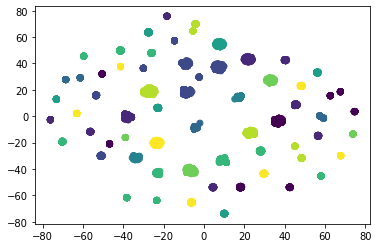

In [17]:
plt.scatter(x=X_embedded[:, 0], y=X_embedded[:,1], c=best_kmeans.labels_);

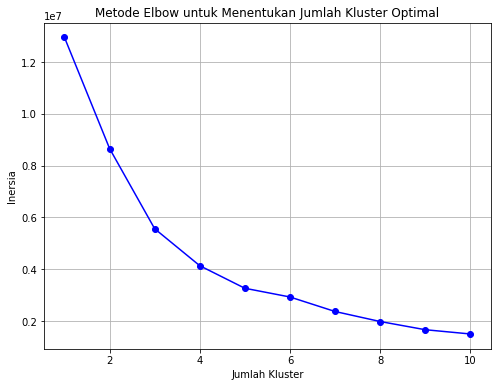

In [18]:
from sklearn.cluster import KMeans


# Hitung inersia (within-cluster sum of squares) untuk berbagai jumlah kluster
inertia = []
k_values = range(1, 11)  # Coba dari 1 hingga 10 kluster
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_embedded)
    inertia.append(kmeans.inertia_)

# Plot elbow method untuk menentukan jumlah kluster yang optimal
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.xlabel('Jumlah Kluster')
plt.ylabel('Inersia')
plt.title('Metode Elbow untuk Menentukan Jumlah Kluster Optimal')
plt.grid()
plt.show()

In [21]:
from sklearn.metrics import silhouette_score

# Inisialisasi model K-Means dengan jumlah kluster yang berbeda (misalnya, 2 hingga 5)
k_values = range(2, 11)
best_score = -1
best_k = 0

score_list = list()
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto")
    kmeans.fit(X_embedded)
    
    # Prediksi kluster untuk setiap data poin
    labels = kmeans.labels_
    
    # Hitung Silhouette Score untuk evaluasi
    score = silhouette_score(X_embedded, labels)
    score_list.append(score)
    # Cek jika nilai Silhouette Score lebih baik daripada sebelumnya
    if score > best_score:
        best_score = score
        best_k = k

# Setel model K-Means dengan jumlah kluster terbaik
best_kmeans = KMeans(n_clusters=best_k, random_state=0, n_init="auto")
best_kmeans.fit(X_embedded)

# Tambahkan label kluster ke dataset
df['Cluster'] = best_kmeans.labels_

# Output hasil
print("Jumlah Kluster Terbaik:", best_k)
print("Silhouette Score Terbaik:", best_score)

Jumlah Kluster Terbaik: 10
Silhouette Score Terbaik: 0.53964


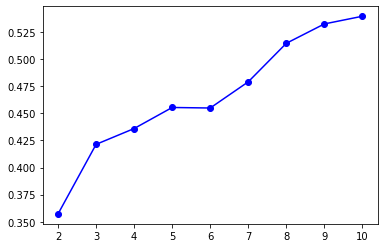

In [23]:
plt.plot(k_values, score_list, marker='o', linestyle='-', color='b');

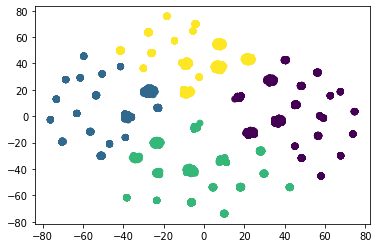

In [25]:
best_kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto")
best_kmeans.fit(X_embedded)

plt.scatter(x=X_embedded[:, 0], y=X_embedded[:,1], c=best_kmeans.labels_);

In [32]:
X[X["Cluster"] == 0]

,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Cluster
1,0,0,0,0,0,0,0
3,0,0,2,1,2,2,0
11,0,0,0,0,0,0,0
21,2,0,0,0,0,0,0
24,0,2,2,1,2,2,0
...,...,...,...,...,...,...,...
7020,0,2,0,0,2,0,0
7029,0,0,2,1,0,2,0
7035,0,0,0,0,0,0,0
7037,0,2,2,1,2,2,0
